# Classification model on Cardiotocography dataset

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist


import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set parameters

In [2]:
lr = 0.01
no_epochs = 200
batch_size = 32

NO_INPUTS = 21
no_neurons = 10
NO_CLASSES = 3


seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

## Read data

In [3]:
# read in data from csv file
df = pd.read_csv('ctg_data_cleaned.csv')
df=df.values

In [4]:
# data
# generate training data from csv file

# inputs are the first 21 columns
X = df[:,0:21]
# normalizing every input
max_arr = np.max(X, axis = 0)
min_arr = np.min(X, axis = 0)
for i in range(2126):
    for j in range(21):
        X[i,j] = (X[i,j] - min_arr[j])/(max_arr[j] - min_arr[j])

# target is the last column
Y = df[:,22]
# convert [1,2,3] to [0,1,2] as class label starts from 0
Y -= 1
Y = Y.reshape(2126,1).astype(int)

# split training and testing sets (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) 

## Build and train model
Here the number of hidden layer is 2.

In [5]:
# min and max value for weight initialization
w_min_relu1 = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_max_relu1 = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_min_relu2 = -np.sqrt(6)/np.sqrt(2*no_neurons)
w_max_relu2 = np.sqrt(6)/np.sqrt(2*no_neurons)
w_min_softmax = -4*np.sqrt(6)/np.sqrt(no_neurons+NO_CLASSES)
w_max_softmax = 4*np.sqrt(6)/np.sqrt(no_neurons+NO_CLASSES)

# decay parameter for weight regularization
beta = 0.000001

model = Sequential([Dense(no_neurons, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu1, w_max_relu1), 
                          kernel_regularizer=l2(beta)),
                    Dense(no_neurons, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                          kernel_regularizer=l2(beta)),
                    Dense(NO_CLASSES, activation='softmax', 
                          kernel_initializer=RandomUniform(w_min_softmax, w_max_softmax),
                          kernel_regularizer=l2(beta))])
    
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=1,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Epoch 1/200
47/47 [==============================] - 0s 4ms/step - loss: 0.8700 - accuracy: 0.7009 - val_loss: 0.7236 - val_accuracy: 0.7821
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.7897 - val_loss: 0.6799 - val_accuracy: 0.7821
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7903 - val_loss: 0.6550 - val_accuracy: 0.7821
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.7910 - val_loss: 0.6333 - val_accuracy: 0.7821
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7910 - val_loss: 0.6105 - val_accuracy: 0.7868
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8017 - val_loss: 0.5711 - val_accuracy: 0.7821
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7997 - val_loss: 0.5366 - val_accuracy: 0.7884
Epoch 8/200
4

Epoch 59/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8945 - val_loss: 0.2803 - val_accuracy: 0.8950
Epoch 60/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8952 - val_loss: 0.2828 - val_accuracy: 0.8934
Epoch 61/200
47/47 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.8911 - val_loss: 0.2774 - val_accuracy: 0.9013
Epoch 62/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8945 - val_loss: 0.2883 - val_accuracy: 0.8856
Epoch 63/200
47/47 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.8952 - val_loss: 0.2769 - val_accuracy: 0.8997
Epoch 64/200
47/47 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.8958 - val_loss: 0.2803 - val_accuracy: 0.8856
Epoch 65/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8952 - val_loss: 0.2769 - val_accuracy: 0.8903
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9012 - val_loss: 0.2513 - val_accuracy: 0.8903
Epoch 117/200
47/47 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8985 - val_loss: 0.2502 - val_accuracy: 0.8966
Epoch 118/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.8985 - val_loss: 0.2561 - val_accuracy: 0.8934
Epoch 119/200
47/47 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.8965 - val_loss: 0.2493 - val_accuracy: 0.9013
Epoch 120/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.8985 - val_loss: 0.2483 - val_accuracy: 0.8997
Epoch 121/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.8972 - val_loss: 0.2517 - val_accuracy: 0.8966
Epoch 122/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.8972 - val_loss: 0.2502 - val_accuracy: 0.8997
Epoch 123/200

47/47 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9026 - val_loss: 0.2668 - val_accuracy: 0.8871
Epoch 174/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9012 - val_loss: 0.2447 - val_accuracy: 0.8903
Epoch 175/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9046 - val_loss: 0.2530 - val_accuracy: 0.8856
Epoch 176/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9073 - val_loss: 0.2474 - val_accuracy: 0.8950
Epoch 177/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.8999 - val_loss: 0.2385 - val_accuracy: 0.9028
Epoch 178/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.8985 - val_loss: 0.2385 - val_accuracy: 0.8997
Epoch 179/200
47/47 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9005 - val_loss: 0.2358 - val_accuracy: 0.9060
Epoch 180/200

## Plot accuracy and loss curves

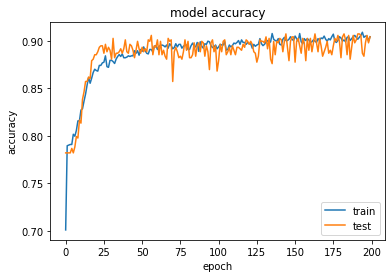

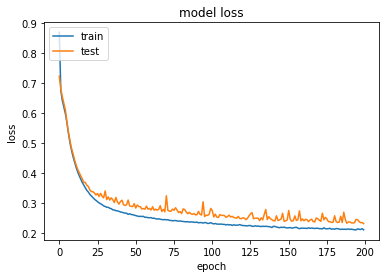

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("5Acc.png")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("5Loss.png")
plt.show()